In [13]:
%matplotlib inline
from glob import glob
import skimage.io as skio

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

""" statistical data visualization packages"""
import seaborn as sns

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [14]:
from funcoes import apply_filter, plot_captchas, quebra_captcha, modela_captcha

In [15]:
captchas_files = sorted(glob('../testes/captcha_teste*.png'))
imgs = skio.imread_collection(captchas_files)

In [16]:
v = 2

In [17]:
unblobbed = [apply_filter(img, v) for img in imgs]

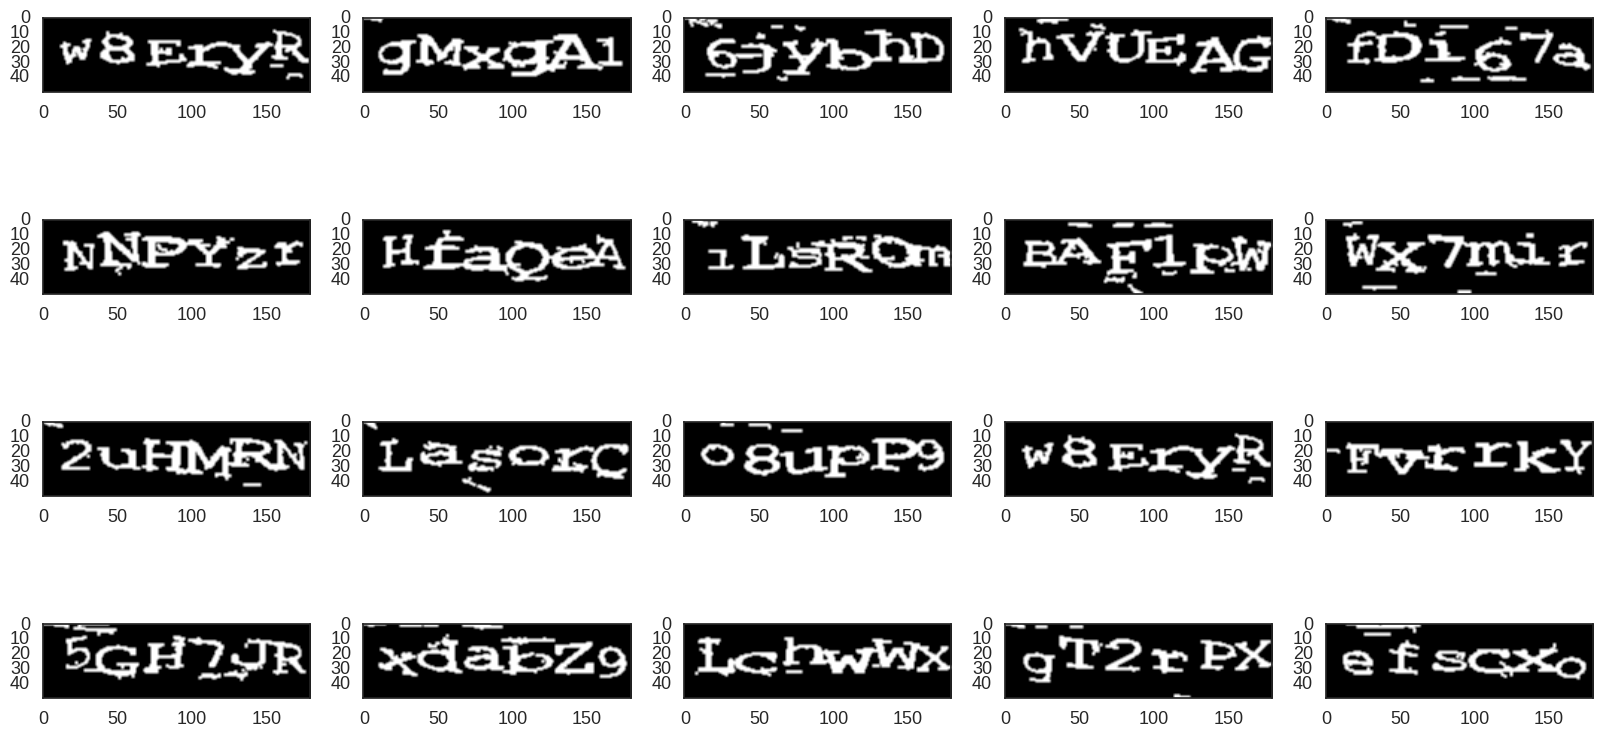

In [18]:
plot_captchas( unblobbed, (4, 5) )

In [19]:
certo = ['w8EryR', 'gMxgA1', '6jybhD', 'hVUEAG', 'fDi67a',
        'NNPYzr', 'HfaQeA', 'iLsROm', 'BAF1pW', 'Wx7m1r',
        '2uHMRN', 'Lasorc', 'o8upp9', 'w8EryR', 'FvrrkY',
        '5GH7JR', 'xdabZ9', 'Lchwwx', 'gT2rPX', 'efsCXo']

# Tentativa com funções super_score

In [ ]:
%%time
%%capture
respostasSS = []
v = 6 # super score possui 6 versões até o momento (6 é a mais nova)
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha, v)
    #print("resposta "+ str(i) + ": " + resposta)
    respostasSS.append(resposta)

In [ ]:
print(respostasSS)

In [ ]:
super_score = []
for i, captcha in enumerate(certo):

    super_score.append(0)
    for j, letra in enumerate(captcha):
        if (letra.lower() == respostasSS[i][j].lower()):
            super_score[i] += 1

In [ ]:
print(super_score)

In [ ]:
print("pontos totais: " + str(sum(super_score)/(20*6)))

# Tentativa com modelo ML

## Balanced

In [20]:
%%time
%%capture
respostasML1 = []
for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha, tipo = "image")
    respostasML1.append(resposta)
    #print()
    #break
    #[item for sublist in l for item in sublist]

CPU times: user 252 ms, sys: 20 ms, total: 272 ms
Wall time: 271 ms


In [21]:
print(respostasML1)

['vsErvs', 'gwzgAz', '8svnHc', 'nvvsAc', 'r3ss7a', 'sNE1zz', 'HfaQeA', 'rLskGw', 'BAF1nw', 'sk7Air', '7uHMRA', 'L8svrc', 'vHunp9', 'vsErvs', 'Fvsck3', 'tuH77A', 'waRnks', 'Lnuwbs', 'j77rFs', 'ersuxs']


In [22]:
ML1 = []

for i, captcha in enumerate(certo):
    
    ML1.append(0)
    for j, letra in enumerate(captcha):  
        if (letra.lower() == respostasML1[i][j].lower()):
            ML1[i] += 1

In [23]:
print(ML1)

[2, 3, 1, 2, 2, 2, 6, 2, 5, 2, 4, 4, 3, 2, 3, 2, 0, 2, 1, 3]


In [24]:
print("pontos totais: " + str(sum(ML1)/(20*6)))

pontos totais: 0.425


# Tentativa com Tesseract

In [ ]:
#%%time
#%%capture
#respostasTS = []
#for i, captcha in enumerate(unblobbed):
#    resposta = tsrct_captcha(captcha)
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasTS.append(resposta)

In [ ]:
#print(respostasTS)

In [ ]:
#tesseract = []

#for i, captcha in enumerate(certo):

    #tesseract.append(0)    
    #for j, letra in enumerate(captcha):
        #if (letra == respostasTS[i][j]):
        #    tesseract[i] += 1

In [ ]:
#print(tesseract)

In [ ]:
#print("pontos totais: " + str(sum(tesseract)/(20*6)))

# Conclusão

Técnica ____________ obteve melhores resultados na previsão.